<font size="5">Extracting the data from .db file(Data Base) and Combining tables</font>

In [2]:
import os
os.getcwd()

'D:\\IDMA\\Project2'

In [9]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

<font size="5">Extracting tables from database

df_listings =pd.read_sql_table('listings','sqlite:///airbnb.db')
df_reviews =pd.read_sql_table('reviews','sqlite:///airbnb.db')
df_hosts =pd.read_sql_table('hosts','sqlite:///airbnb.db')
df_calender =pd.read_sql_table('calendar','sqlite:///airbnb.db')

In [24]:
df_listings.head(2)

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942


In [25]:
df_listings.shape

(1749, 14)

<AxesSubplot:>

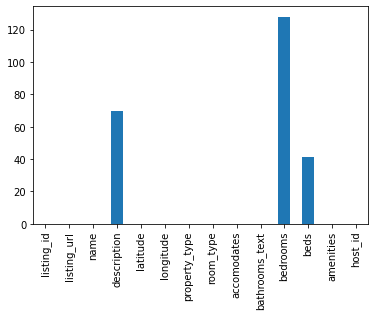

In [28]:
df_listings.isna().sum().plot(kind='bar')

In [30]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


In [32]:
df_reviews.shape

(62987, 6)

In [35]:
df_calender.head(2)

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,False,56.0,56.0,3,5
1,2,22742449,2022-11-13,True,95.0,95.0,2,99


In [34]:
df_calender['listing_id'].nunique()

1749

<font size="5">Fetching latest prices for better prediction

In [41]:
df_calender.sort_values('date').groupby('listing_id').tail(3)

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125
...,...,...,...,...,...,...,...,...
196873,196874,38547626,2022-12-25,False,68.0,68.0,2,1125
115452,115453,12746696,2022-12-25,False,96.0,96.0,2,1125
253381,253382,51123661,2022-12-25,True,175.0,175.0,1,365
253370,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


<font size="5">Creating mean of the latest 3 values in by sorting calender

In [49]:
df_calender_tail=df_calender.sort_values('date').groupby('listing_id').tail(3)

In [51]:
df_calender_mean = df_calender_tail.groupby('listing_id').mean()

In [52]:
df_calender_mean

,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
50904,166029.333333,0.0,166.666667,158.666667,1.0,60.0
116134,173487.666667,1.0,150.000000,150.000000,2.0,1125.0
218916,163471.333333,0.0,85.000000,85.000000,1.0,50.0
224333,193003.333333,1.0,16.000000,16.000000,14.0,365.0
224682,111238.333333,1.0,85.000000,85.000000,2.0,30.0
...,...,...,...,...,...,...
53916524,65968.000000,1.0,88.000000,88.000000,3.0,365.0
53928545,120818.666667,1.0,49.000000,49.000000,20.0,1125.0
53929354,163447.666667,1.0,90.000000,90.000000,1.0,365.0


In [54]:
df_calender_mean.shape

(1749, 6)

In [92]:
df_calender_mean.reset_index(level=0, inplace=True)
df_calender_mean

,index,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,0,50904,166029.333333,0.0,166.666667,158.666667,1.0,60.0
1,1,116134,173487.666667,1.0,150.000000,150.000000,2.0,1125.0
2,2,218916,163471.333333,0.0,85.000000,85.000000,1.0,50.0
3,3,224333,193003.333333,1.0,16.000000,16.000000,14.0,365.0
4,4,224682,111238.333333,1.0,85.000000,85.000000,2.0,30.0
...,...,...,...,...,...,...,...,...
1744,1744,53916524,65968.000000,1.0,88.000000,88.000000,3.0,365.0
1745,1745,53928545,120818.666667,1.0,49.000000,49.000000,20.0,1125.0
1746,1746,53929354,163447.666667,1.0,90.000000,90.000000,1.0,365.0
1747,1747,53949105,191385.000000,1.0,990.000000,990.000000,2.0,1125.0


In [56]:
#df_calender_mean.drop(['index'],axis=1)

In [42]:
df_hosts.head(2)

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."


In [44]:
df_hosts['host_id'].nunique()

1111

In [62]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


<font size="5">Adding 2 columns a)Total reviews b)Since the latest review

In [59]:
number_of_reviews = df_reviews.groupby('listing_id').count()['review_id'].to_dict()

In [65]:
df_reviews['total_reviews']=df_reviews['listing_id'].map(number_of_reviews)

In [68]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,total_reviews
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",2
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",120
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar...",120
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...,120


In [128]:
basedate2=pd.Timestamp('2022-05-01')
days_since_review=abs(df_reviews['date']-basedate2).dt.days
days_since_review

0        2552
1         203
2        3709
3        3628
4        3162
         ... 
62982     147
62983     140
62984     131
62985     133
62986     129
Name: date, Length: 62987, dtype: int64

In [129]:
df_reviews['days_since_review']=days_since_review

In [82]:
df_reviews.head(2)

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,total_reviews,days_since_review
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2,2552
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",2,203


In [75]:
total_reviews = df_reviews.groupby('listing_id').count()[['review_id']]

In [76]:
total_reviews

,review_id
listing_id,
50904,2
116134,120
218916,28
224333,3
224682,349
...,...
53522234,2
53538847,1
53600839,1


In [77]:
total_reviews.reset_index(level=0, inplace=True)

In [78]:
total_reviews.columns=['listing_id','total_reviews']

In [79]:
total_reviews

,listing_id,total_reviews
0,50904,2
1,116134,120
2,218916,28
3,224333,3
4,224682,349
...,...,...
1520,53522234,2
1521,53538847,1
1522,53600839,1
1523,53819793,1


In [87]:
recent_reviews = df_reviews.groupby('listing_id').mean()[['days_since_review']]
recent_reviews.reset_index(level=0, inplace=True)

In [88]:
recent_reviews

,listing_id,days_since_review
0,50904,1377.500000
1,116134,1559.908333
2,218916,2457.250000
3,224333,1632.000000
4,224682,1771.143266
...,...,...
1520,53522234,143.000000
1521,53538847,147.000000
1522,53600839,140.000000
1523,53819793,131.000000


<font size="5">Merging of Tables.
We need to keep add one table to another still all 4 joins

In [90]:
df_reviews_final = pd.merge(total_reviews,recent_reviews, on='listing_id', how ='inner')

In [93]:
df_reviews_final.head(2)

,listing_id,total_reviews,days_since_review
0,50904,2,1377.500000
1,116134,120,1559.908333


In [95]:
df_cal_list = pd.merge(df_calender_mean,df_listings,on='listing_id', how ='inner')
df_cal_list.shape

(1749, 21)

In [98]:
df_cal_list_host = pd.merge(df_cal_list,df_hosts,on='host_id', how ='inner')
df_cal_list_host.shape

(1749, 25)

In [102]:
df_cal_list_host_reviews = pd.merge(df_cal_list_host,df_reviews_final,on='listing_id', how ='left')
df_cal_list_host_reviews.shape

(1749, 27)

In [105]:
df_cal_list_host_reviews.head(2)

,index,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review
0,0,50904,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1377.5
1,17,891884,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,638.0


<AxesSubplot:>

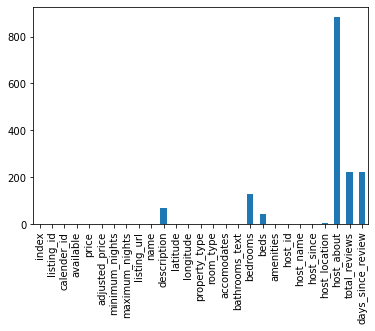

In [107]:
df_cal_list_host_reviews.isna().sum().plot(kind='bar')

In [108]:
df_cal_list_host_reviews.to_csv('merged_airbnb.csv')

In [116]:
df_cal_list_host_reviews.head(2)

,index,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review
0,0,50904,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1377.5
1,17,891884,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,638.0


'**Data Cleaning and checking'

In [112]:
df = pd.read_csv('merged_airbnb.csv')

In [117]:
df.head(2)

,Unnamed: 0,index,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review
0,0,0,50904,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1377.5
1,1,17,891884,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,638.0


In [118]:
df.drop(['index'],axis=1,inplace=True)

In [119]:
df.head(2)

,Unnamed: 0,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews,days_since_review
0,0,50904,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,1377.5
1,1,891884,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,638.0


<AxesSubplot:>

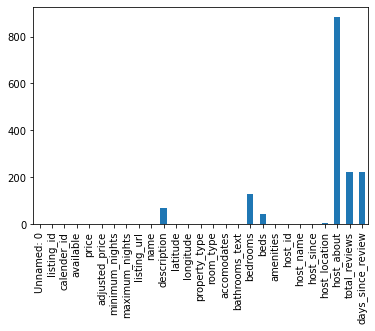

In [120]:
df.isna().sum().plot(kind='bar')

In [122]:
df.drop(['host_about'],axis=1,inplace=True)

<AxesSubplot:>

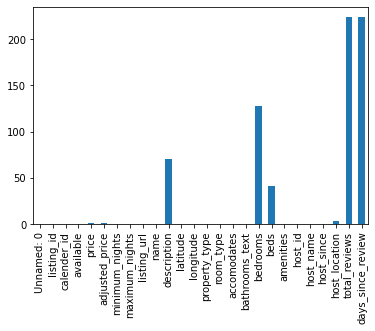

In [123]:
df.isna().sum().plot(kind='bar')

In [124]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'calender_id', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'listing_url',
       'name', 'description', 'latitude', 'longitude', 'property_type',
       'room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'host_id', 'host_name', 'host_since', 'host_location',
       'total_reviews', 'days_since_review'],
      dtype='object')

In [125]:
df.drop(['Unnamed: 0','calender_id','listing_url'],axis=1,inplace=True)

<AxesSubplot:>

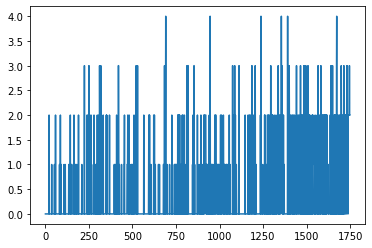

In [127]:
df.isna().sum(axis=1).plot()